In [1]:
## Preliminary

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
## Finding missing values

In [5]:
df.isna().sum()

property_id                    0
property_name                 24
property_summary             212
property_space              2309
property_desc                  3
property_neighborhood       2811
property_notes              4522
property_transit            2580
property_access             3135
property_interaction        3404
property_rules              3169
property_zipcode             134
property_lat                   0
property_lon                   0
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
property_scraped_at            0
property_last_updated          0
host_id                        0
host_since                     1
host_location                 33
host_about                  3107
host_response_time          1461
host_respo

In [6]:
# First, we eliminate irrelevant columns and columns with too many missing values

In [7]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_response_rate
df.drop(['host_response_rate'], axis=1, inplace=True)

# Deleted columns host_nr_listings
df.drop(['host_nr_listings'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_price_covers
df.drop(['booking_price_covers'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

# Deleted columns reviews_acc
df.drop(['reviews_acc'], axis=1, inplace=True)

# Deleted columns reviews_cleanliness
df.drop(['reviews_cleanliness'], axis=1, inplace=True)

# Deleted columns reviews_checkin
df.drop(['reviews_checkin'], axis=1, inplace=True)

# Deleted columns reviews_communication
df.drop(['reviews_communication'], axis=1, inplace=True)

# Deleted columns reviews_location
df.drop(['reviews_location'], axis=1, inplace=True)

# Deleted columns reviews_value
df.drop(['reviews_value'], axis=1, inplace=True)

# Deleted columns reviews_per_month
df.drop(['reviews_per_month'], axis=1, inplace=True)

# Deleted columns reviews_rating
df.drop(['reviews_rating'], axis=1, inplace=True)

In [8]:
## Data manipulation

In [9]:
# 1. property_zipcode

In [10]:
#df["property_zipcode"].fillna(1000, inplace=True)

In [11]:
#df.insert(0, 'zipcode', df['property_zipcode'].astype(str).str.startswith('2').astype(int))
df.drop('property_zipcode', axis=1, inplace=True)

In [12]:
# 2. property_type

In [13]:
df.property_type.value_counts()

Apartment             4965
House                  888
Loft                   171
Bed & Breakfast        166
Townhouse              114
Condominium             78
Guesthouse              35
Other                   30
Villa                   19
Cabin                    7
Serviced apartment       4
Castle                   3
Dorm                     2
Guest suite              2
Hostel                   2
Boutique hotel           2
Earth House              1
Camper/RV                1
Yurt                     1
Chalet                   1
Boat                     1
Tent                     1
Timeshare                1
Name: property_type, dtype: int64

In [14]:
nbh_counts = df.property_type.value_counts()

In [15]:
other_nbhs = list(nbh_counts[nbh_counts <= 200].index)

In [16]:
df['property_type'] = df['property_type'].replace(other_nbhs,"Other")

In [17]:
df['property_type'].unique()

array(['Apartment', 'House', 'Other'], dtype=object)

In [18]:
df = pd.concat([df, pd.get_dummies(df['property_type'], prefix='property_type')],axis=1)

In [19]:
df = df.drop(['property_type'],axis=1)

In [20]:
# 3. property_room_type

In [21]:
df.property_room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [22]:
df = pd.concat([df, pd.get_dummies(df['property_room_type'], prefix='property_room_type')],axis=1) 

In [23]:
df = df.drop(['property_room_type'],axis=1)

In [24]:
# 4. property_bed_type

In [25]:
df.property_bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [26]:
df.property_bed_type.value_counts()

Real Bed         6281
Pull-out Sofa     151
Futon              35
Couch              23
Airbed              5
Name: property_bed_type, dtype: int64

In [27]:
df.property_bed_type = df.property_bed_type.map(lambda x: 1 if x=='Real Bed' else 0)

In [28]:
# 5. property_amenities

In [29]:
df['property_amenities'] = df['property_amenities'].fillna('')

In [30]:
df.property_amenities[:1].values

array(['Internet, Wireless Internet, Kitchen, Smoking allowed, Heating, Washer, Essentials, Shampoo, Hangers, Hair dryer, translation missing: en.hosting_amenity_49, translation missing: en.hosting_amenity_50'],
      dtype=object)

In [31]:
amenities_list = df['property_amenities'].tolist()
amenities_set = set()
for amenity_string in amenities_list:
    if pd.notnull(amenity_string):
        amenities = amenity_string.split(',')
        for amenity in amenities:
            stripped_amenity = amenity.strip()
            if stripped_amenity and stripped_amenity not in ['translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50']:
                amenities_set.add(stripped_amenity)
amenities_set

{'24-hour check-in',
 'Accessible-height bed',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Beach essentials',
 'Bed linens',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'First aid kit',
 'Flat smooth pathway to front door',
 'Free parking on premises',
 'Free parking on street',
 'Game console',
 'Garden or backyard',
 'Grab-rails for shower and toilet',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'High chair',
 'Hot tub',
 'H

In [32]:
def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0
    
def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + ': ' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            dummy_df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [33]:
df = set_to_dummies(df, 'property_amenities')

In [34]:
df = df.drop(['property_amenities'],axis=1)

In [35]:
# 6. host_since

In [36]:
df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')

In [37]:
df['host_since'] = df['host_since'].fillna('01-01-2023')

In [38]:
df = df.drop(['host_since'],axis=1)

In [39]:
# 7. host_response_time

In [40]:
df.host_response_time.unique()

array(['within a few hours', 'within an hour', 'a few days or more',
       'within a day', nan], dtype=object)

In [41]:
df['host_response_time'] = df['host_response_time'].fillna('a few days or more')

In [42]:
df = pd.concat([df, pd.get_dummies(df['host_response_time'], prefix='host_response_time')],axis=1) 

In [43]:
df = df.drop(['host_response_time'],axis=1)

In [44]:
# 8. property_bathrooms

In [45]:
mode_bathroom = df.property_bathrooms.mode()

In [46]:
df["property_bathrooms"] = df["property_bathrooms"].fillna(1)

In [47]:
df = df.drop(['property_bathrooms'],axis=1)

In [48]:
# 9. property_bedrooms

In [49]:
mode_bedroom = df.property_bedrooms.mode()

In [50]:
df["property_bedrooms"] = df["property_bedrooms"].fillna(1)

In [51]:
df = df.drop(['property_bedrooms'],axis=1)

In [52]:
# 10. property_beds

In [53]:
mode_beds = df.property_beds.mode()

In [54]:
df["property_beds"] = df["property_beds"].fillna(2)

In [55]:
df = df.drop(['property_beds'],axis=1)

In [56]:
# 11. booking_availability

In [57]:
corr_matrix = df[['booking_availability_30', 'booking_availability_60', 'booking_availability_90', 'booking_availability_365', 'target']].corr()
print(corr_matrix)

                          booking_availability_30  booking_availability_60  \
booking_availability_30                  1.000000                 0.938763   
booking_availability_60                  0.938763                 1.000000   
booking_availability_90                  0.870376                 0.965362   
booking_availability_365                 0.557821                 0.626988   
target                                  -0.008915                -0.005604   

                          booking_availability_90  booking_availability_365  \
booking_availability_30                  0.870376                  0.557821   
booking_availability_60                  0.965362                  0.626988   
booking_availability_90                  1.000000                  0.673121   
booking_availability_365                 0.673121                  1.000000   
target                                  -0.003957                 -0.009949   

                            target  
booking_availabilit

In [58]:
df = df.drop(['booking_availability_30'],axis=1)
df = df.drop(['booking_availability_60'],axis=1)
df = df.drop(['booking_availability_90'],axis=1)

In [59]:
# 12. booking_cancel_policy

In [60]:
df.booking_cancel_policy.unique()

array(['flexible', 'moderate', 'strict', 'super_strict_30'], dtype=object)

In [61]:
df = pd.concat([df, pd.get_dummies(df['booking_cancel_policy'], prefix='booking_cancel_policy')],axis=1)

In [62]:
df = df.drop(['booking_cancel_policy'],axis=1)

In [63]:
# 13. extra

In [64]:
#df['extra'] = df['extra'].fillna('')

In [65]:
#df.extra[2:3].values

In [66]:
#extras_list = df['extra'].tolist()
#extras_set = set()
#for extra_string in extras_list:
 #   if pd.notnull(extra_string):
  #      extras = extra_string.split(',')
   #     for extra in extras:
    #        stripped_extra = extra.strip()
     #       if stripped_extra and stripped_extra not in ['Require Guest Phone Verification', 'Require Guest Profile Picture']:
      #          extras_set.add(stripped_extra)
#extras_set

In [67]:
#def new_dum_col_filling(main_col_val, dum_col_name, main_col_name):
 #   if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
  #      return 1
   # else:
    #    return 0
    
#def new_set_to_dummies(df, column_name):
 #   new_all_values_of_sets = extras_set
  #  new_dummy_columns_name = [column_name + ': ' + dum_col for dum_col in new_all_values_of_sets if dum_col]
   # new_dummy_df = pd.DataFrame(0, index=df.index, columns=new_dummy_columns_name)
    #for dum_col_name in new_dummy_columns_name:
     #   for i in df.index:
            #new_dummy_df[dum_col_name][i] = new_dum_col_filling(df[column_name][i], dum_col_name, column_name)
    #df = pd.concat([df, new_dummy_df], axis=1)
    #return df

In [68]:
#df = new_set_to_dummies(df, 'extra')

In [69]:
df = df.drop(['extra'],axis=1)

In [70]:
# 14. target

In [71]:
df['target'] = np.log(df['target'])

In [72]:
# 15. host_nr_listings_total

In [73]:
df.host_nr_listings_total.fillna(1.0).astype('float64')

0       1.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
6490    1.0
6491    1.0
6492    1.0
6493    2.0
6494    2.0
Name: host_nr_listings_total, Length: 6495, dtype: float64

In [74]:
df = df.drop(['host_nr_listings_total'],axis=1)

In [75]:
# 16. reviews_num

In [76]:
max_review = df.reviews_num.max()

In [77]:
df["reviews_num"] = (df["reviews_num"]/max_review)

In [78]:
## Cross-validation

In [79]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# create target and features
a = df.drop(['target'], axis = 1)
b = df.target

# split our data
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=13)

In [80]:
# scale data and normalize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [83]:
from sklearn import linear_model
from sklearn import metrics

# linear regression testing
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
r2_lr = metrics.r2_score(y_test, reg.predict(X_test))

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print (f"r2: {round(r2_lr, 5)}")

r2: -0.02733


In [84]:
# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
r2_rr = metrics.r2_score(y_test, ridge.predict(X_test))

y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print (f"r2: {round(r2_rr, 5)}")

r2: -0.02697


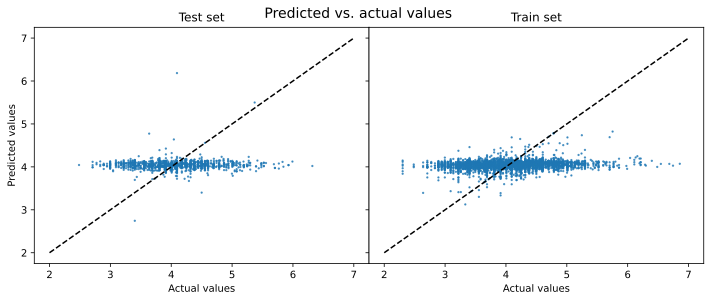

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)
    
ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

In [86]:
import xgboost as xgb
# create a baseline
booster = xgb.XGBRegressor()

In [87]:
from sklearn.model_selection import GridSearchCV

# create Grid of parameters
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [88]:
# instantiate xgboost with the most optimal parameters
booster = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                           max_depth=7, n_estimators=100, random_state=4)

# train the model
booster.fit(X_train, y_train)

# predict the values
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [89]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 5)}")

RMSE: 0.56416


In [90]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 5)}")

r2: -0.01774


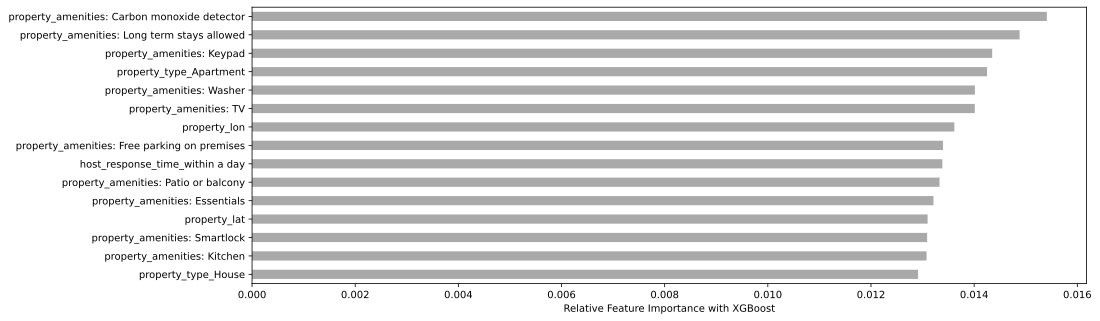

In [91]:
# plot the important features
features_importance = pd.Series(booster.feature_importances_, index=a.columns)
features_importance.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(15,5))
plt.xlabel('Relative Feature Importance with XGBoost');